# Classwork 2: numerical calculus and Fourier analysis

#### Deadline: 2 August 2023 (by the end of the day)

#### Credits: 20 points

## Name/s: Gabriel Balarezo

### Statement of author contribution (only needed if you work in pairs)

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec


- **You may work individually or in pairs.** Please include your name/s in the notebook.


- Within a **single python notebook**, solve the following problems:

In [1]:
import sympy as sp
sp.init_printing()
import scienceplots
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.signal as ss
from skimage.transform import rescale
import pyvista as pv
import pandas as pd 
import matplotlib.image as mpimg
from PIL import Image, ImageDraw

In [2]:
# set plot style
plt.style.use(['science', 'notebook', 'no-latex'])

### 1. (4 points) Chemical-physics (system of linear equations):

The following chemical reaction is unbalanced:

$C_2H_6 + O_2\to CO_2 + H_2O$

Our job is to find $(𝑥_1,𝑥_2,𝑥_3,𝑥_4)$, so that the above equation is balanced:

$x_1\,C_2H_6 + x_2\,O_2\to x_3\,CO_2 + x_4\,H_2O$

#### (a) Write down the system of linear equations, so that each element is balanced:
- Carbon (C)

- Hydrogen (H)

- Oxygen (O)

Carbon: $2x_1 - x_3 = 0$

Hydrogen: $6x_1 - 2x_4 = 0$

Oxygen: $2x_2 - 2x_3 - x_4 = 0$

#### (b) Create a python routine that finds the parametric solution to the system of linear equations.

In [3]:
# Define symbols
x = sp.symbols('x1:5', subs=True)  # x1, x2, x3, x4 with subscripts

# Define the equations 
C_eq = sp.Eq(2 * x[0], x[2])  
H_eq = sp.Eq(6 * x[0], 2 * x[3])
O_eq = sp.Eq(2 * x[1], 2 * x[2] + x[3]) 

# Let's define a function to solve this system algebraically
param_sol = lambda eq1, eq2, eq3, x: sp.solve((eq1, eq2, eq3),x)

In [4]:
# Call the function 
solution = param_sol(C_eq, H_eq, O_eq, x)

# Print the solution
print(solution)

{x1: x4/3, x2: 7*x4/6, x3: 2*x4/3}


#### (c) Write down one of the feasible solutions for the balanced chemical reaction.

In [5]:
# Let x4 = 3
def BalanceEq(x4):
    """ 
    This function evaluates the values of x1, x2, x3, and x4
    given a value of x4 to balance the chemical equation

    Arguments: 
            - x4 (int) : The value of x4
    
    Returns:
            - prints out the values of x1, x2, x3, and x4
    """
    
    x1 = x4/3
    x2 = 7 * x4/6
    x3 = 2 * x4/3

    print(f"x1 = {x1}, x2 = {x2}, x3 = {x3}, x4 = {x4}")

In [6]:
# Call the function
BalanceEq(6.)

x1 = 2.0, x2 = 7.0, x3 = 4.0, x4 = 6.0


#### Feasible solutions 

$2\,C_2H_6 + 7\,O_2\to 4\,CO_2 + 6\,H_2O$

### 2. (4 points) Potentials and Forces (optimisation)

The potential energy of a particle in a field has the form:

$$V(r)=\frac{3}{2r^2} - \frac{14}{3r}$$

where $r$ is the distance from the centre of the field.

#### (a) Create a python function to compute this potential as a function of $r$.

In [7]:
# Define the function 
def Potential(r_vector):
    """
    Function to compute the potential as 
    as function of r.
    
    Arguments:
            - r_vector (array) : The distance vector

    Returns:
            - V_r (array) : The potential vector

    """
    V_r = 3/(2 * r_vector**2) - 14/(3 * r_vector)
    
    return V_r 

#### (b) Then, create an appropriate vector for $r$ and plot this potential $V(r)$ versus $r$. What kind of physical system could this potential describe?

In [8]:
# Define a vetor 
r_array = np.linspace(0.01, 20, 10000)

# Call the function 
Vr = Potential(r_array)

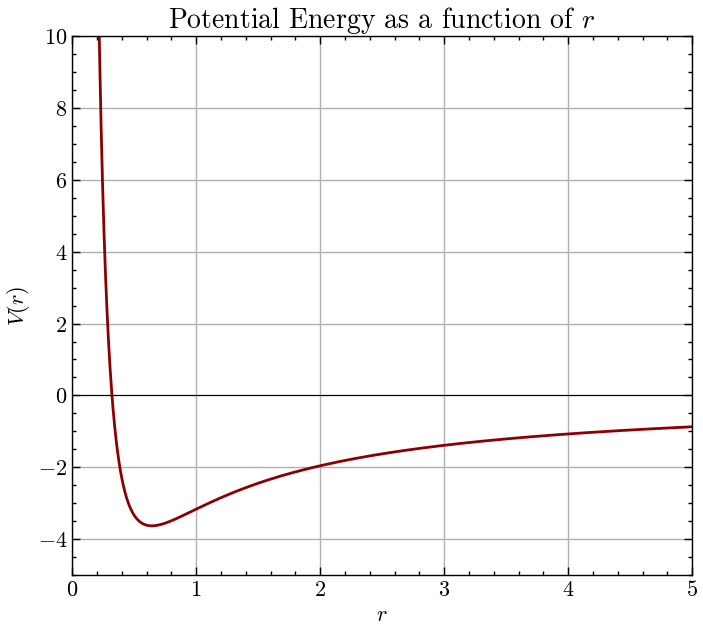

In [9]:
# Ploting 
fig, ax = plt.subplots(figsize = (8, 7))

ax.plot(r_array, Vr, color = 'darkred')
ax.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8)

ax.set_title(r'Potential Energy as a function of $r$', fontsize = 20)
ax.set(xlabel = r'$r$', ylabel = r'$V(r)$', xlim = (0, 5), ylim = (-5, 10))

plt.grid(True)
plt.show()
plt.close()

This potential could describe the potential energy between two molecules. It could be used to describe (in a general way) the dynamics of two molecules as they get closer of far away from each other.

#### (c) Use sympy to compute the force: $F(r)=-\frac{dV}{dr}$. Then, plot the $F(r)$ versus $r$. At which distance, $r_0$, does the force become zero?

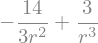

In [10]:
# Compute the force

r = sp.symbols('r') # Define symbols 

# Convert the Python function into a symbolic expression
V_r = sp.sympify(Potential(r))

# Compute the derivative 
F_sym = -1 * sp.diff(V_r, r)

# Print the force
F_sym

In [11]:
# Define a function to compute the force 
F_num = sp.lambdify(r, F_sym, 'numpy')


# Call the function
F = F_num(r_array)

In [12]:
# Let's find the root of this function (r0)
root_F_r = opt.fsolve(F_num, 0.5)

# Print the roots of the function
print(root_F_r[0])

0.6428571428571428


In [13]:
# Evaluate the potential at that point 
p1 = Potential(root_F_r)

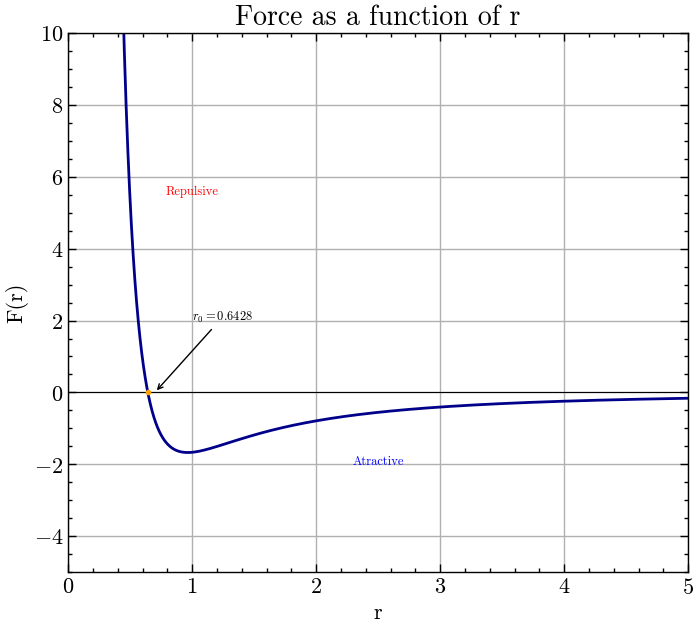

In [14]:
# Plotting 
fig, ax = plt.subplots(figsize = (8, 7))

ax.plot(r_array, F, color = 'darkblue')
#ax.plot(r_array, Vr, color = 'darkred')
ax.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8)
ax.plot(root_F_r, 0, color = 'orange', linestyle = '', marker = 'o', markersize = 3)
#ax.plot([root_F_r[0], root_F_r[0]], [0, p1[0]], linestyle = '--', color = 'black', linewidth = 0.8)

ax.text(0.2, 0.7, 'Repulsive', transform=ax.transAxes, ha='center', fontsize = 9, color = 'red')
ax.text(0.5, 0.2, 'Atractive', transform=ax.transAxes, ha='center', fontsize = 9, color = 'blue')
ax.annotate(r'$r_0 = 0.6428$', xy=(0.7, 0), xytext=(1, 2),
             arrowprops=dict(arrowstyle='->'), fontsize = 9)

ax.set_title('Force as a function of r', fontsize = 20)
ax.set(xlabel = 'r', ylabel = 'F(r)')
ax.set_xlim(0, 5)
ax.set_ylim(-5,10)

plt.grid(True)
plt.show()
plt.close()

From the plot, we can say that the force becomes 0 at $r_0 = 0.6428 u$. (u = units of length)

#### (d) Find the maximum possible value of the attractive force, $F_{max}$, and the distance, $r_{max}$, at which the particle would be subjected to this force.

In [15]:
# Get the maximum value for the atractive force
# Define an array within the range we want to compute the maximum 
minima = ss.argrelextrema(F, np.less)

print("F_max: ", F[minima])
print("r_max: ", r_array[minima])

F_max:  [-1.67291331]
r_max:  [0.96361836]


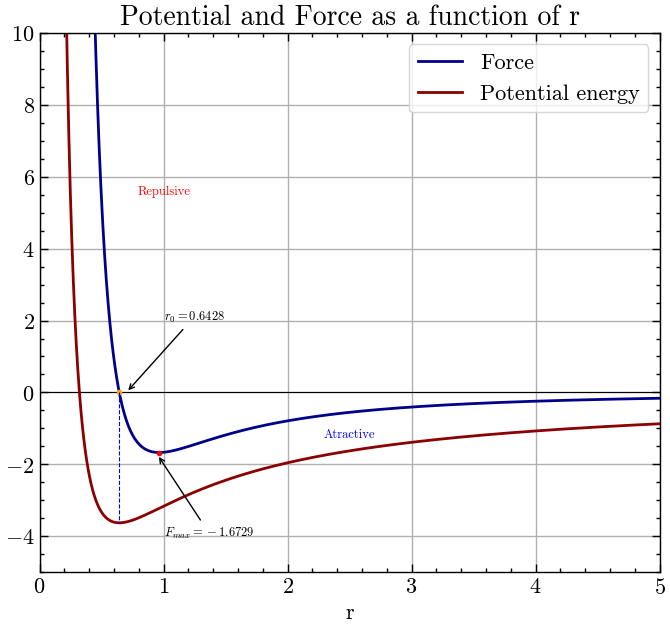

In [16]:
# Plotting the results
fig, ax = plt.subplots(figsize = (8, 7))

ax.plot(r_array, F, color = 'darkblue', label = 'Force') # Force 
ax.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8) # Horizontal line 
ax.plot(r_array[477], F[477], linestyle = '', marker = 'o', markersize = 3, color = 'red') # Max force
ax.plot(root_F_r, 0, color = 'orange', linestyle = '', marker = 'o', markersize = 3) # r_0

ax.plot(r_array, Vr, color = 'darkred', label = 'Potential energy')
ax.plot([root_F_r[0], root_F_r[0]], [0, p1[0]], linestyle = '--', color = 'blue', linewidth = 0.8)

ax.text(0.2, 0.7, 'Repulsive', transform=ax.transAxes, ha='center', fontsize = 9, color = 'red')
ax.text(0.5, 0.25, 'Atractive', transform=ax.transAxes, ha='center', fontsize = 9, color = 'blue')

ax.annotate(r'$r_0 = 0.6428$', xy=(0.7, 0), xytext=(1, 2),
             arrowprops=dict(arrowstyle='->'), fontsize = 9)
ax.annotate(r'$F_{max} = -1.6729$', xy=(0.95, -1.73), xytext=(1, -4),
             arrowprops=dict(arrowstyle='->'), fontsize = 9)


ax.set_title('Potential and Force as a function of r', fontsize = 20)
ax.set(xlabel = 'r')
ax.set_xlim(0, 5)
ax.set_ylim(-5,10)

plt.legend(loc='best', frameon = True)

plt.grid(True)
plt.show()
plt.close()

So, the maximum attractive force is $F_{max} = -16729$, at a radius of $r_{max} = 0.96361836 u$

### 3. (4 points) Thermodynamics (grids and derivatives):

The Earth's atmosphere cools down with altitude. To model this we can assume that the air is adiabatic with an equation of state given by:

$p^{1-\gamma}\,T^{\gamma} = \rm constant$,

where $p$ is the thermal pressure, $T$ is the temperature, and $\gamma=1.4$ is the polytropic index. The above equation results in the following differential equation:

$\frac{dp}{p}=\frac{\gamma}{\gamma - 1}\frac{dT}{T}$

In addition, the equation of hydrostatic equilibrium states that:

$\frac{dp}{p}=-\frac{\mu_m\,g}{R\,T}\,dz$, 

where $\mu_m=28.97\,\rm g\,mol^{-1}$ is the molecular weight of the gas, $g$ is the acceleration due to gravity, $R$ is the ideal gas constant, and $z$ is height above ground level.

Combining the two equations above, we obtain:

$\frac{dT}{dz}=-\frac{\gamma -1}{\gamma}\frac{\mu_m\,g}{R}$,

whose solution reads:

$T=T_0\left(1-\frac{\gamma-1}{\gamma}\frac{z}{z_0}\right)$, 

where $T_0$ is the temperature at ground level, and 

$z_0=\frac{R\,T_0}{\mu_m\,g}$

is the isothermal scale-height calculated using this temperature. 

#### (a) Create a Python function that receives $T_0=20\,\rm ^{\circ}C$ and $z$ as inputs, and returns:

- the value of $z_0$ in $\rm km$


- the function $T(z)$ with $T$ in $\rm ^{\circ}C$

In [17]:
# Define some constants 
mu = 28.97 * 1/1000 # kg/mol
g = 9.81 * 1/1000 # km/s^2
R = 8.3145 * 1/1000**2 # kg*km^2*s^-2*mol^-1
T0 = 20 # degrees celsius 
gamma = 1.4

# Define the function 
def IsothermalFunction(T0, z):
    """
    Function to compute z0, and T. 
    
    Arguments:
            - T0 (float)   : Initial temperature in Celsius
            - z (2D array) : The altitude in meters

    Returns:
            - z0 (float) : The altitude scale height
            - T (2D array) : Temperature map in Celsius
    """
    T_0 = T0 + 273.15 # Kelvin
    
    # compute z0
    z0 = (R * T_0)/(mu * g) 
    
    # compute T
    T = T0 * (1 - (gamma - 1)/gamma * z/z0) # Celsius 
    
    return z0, T

#### (b) Code a Python function that returns a pcolor map of $T(z)$ (i.e. of the stratified atmosphere) interpolated on an ($x \times y$) = ($30\,\rm km\times 30\,\rm km$) grid with $z$ on the vertical axis. Consider that the temperature does not vary across $x$, only with height, $z$.


In [18]:
# Define vectors 
x = np.linspace(0, 30, 500) # km
z = np.linspace(0, 30, 500) # km

# create a grid 
X, Z = np.meshgrid(x, z)

In [19]:
# Evaluate the function 
z0, T = IsothermalFunction(T0, Z)

In [20]:
#define the function 
def TemperatureMap(T):
    """
    Function to plot the temperature map

    Arguments:
            - T (2D array) : The temperature map

    Returns:
            - fig, ax : The figure and axis objects
    """
    
    fig, ax = plt.subplots(figsize = (6, 5))
    
    z = ax.pcolor(X, Z, T, cmap = 'magma')
    cb = plt.colorbar(z)
    
    ax.set_xlabel('x [km]')
    ax.set_ylabel('z [km]')
    cb.set_label(r'Temperature [$^\circ C$]')
    
    return fig, ax

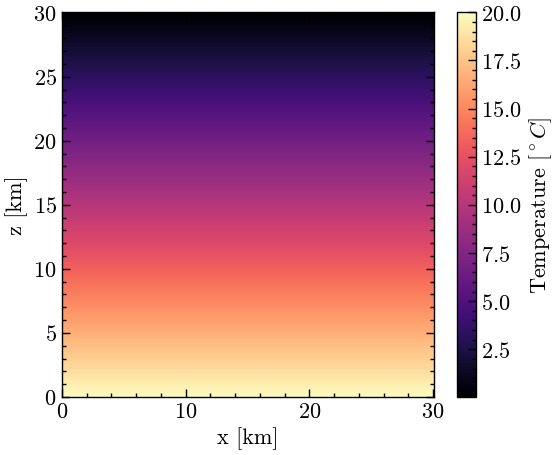

In [21]:
# call the function 
fig, ax = TemperatureMap(T)
plt.show()

#### (c) Code a Python function that returns a quiver map showing the direction of the buoyancy forces in the atmosphere. Remember that $p\propto T^{\frac{\gamma}{\gamma -1}}$.

In [22]:
# compute the 2D pressure  
prs = T**(gamma/(gamma - 1))

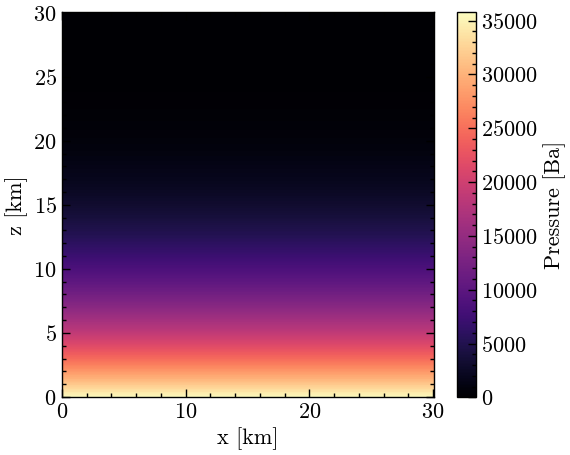

In [23]:
# Make a map of the pressure 

fig, ax = plt.subplots(figsize = (6, 5))

z1 = ax.pcolor(X, Z, prs, cmap = 'magma')
cb = plt.colorbar(z1)

ax.set_xlabel('x [km]')
ax.set_ylabel('z [km]')
cb.set_label(r'Pressure [Ba]')


plt.show()

In [24]:
# define dx
dx = x[1]-x[0]

# define a function to compute the buoyancy forces
def BuoyancyForce(scalar):
    """
    Function to get the grad of a scalar field.
    
    Arguments:
            - scalar (2D array) : The scalar field
            
    Returns:
            - grad_x (2D array) : The gradient in the x direction
            - grad_y (2D array) : The gradient in the y direction
    """
    grad_x = -1 * np.gradient(scalar, dx, axis = 1)
    grad_y = -1 * np.gradient(scalar, dx, axis = 0)
    
    return grad_x, grad_y

In [25]:
# call the function 
F_x, F_y = BuoyancyForce(prs)

In [26]:
# Let's use a function to rescale the vector
def RescaleVectorField(x1, x2, n):
    """
    Function to resize a vector field 
    and its magnitude.

    Arguments:
            - x1 (2D array) : The x component of the vector field
            - x2 (2D array) : The y component of the vector field
            - n (float) : The new size of the vector field

    Returns:
            - x1_res (2D array) : The resized x component
            - x2_res (2D array) : The resized y component
            - mag_x_res (2D array) : The resized magnitude
    """
    # Rescale the components
    x1_res = rescale(x1, n)
    x2_res = rescale(x2, n)
    
    mag_x = np.sqrt(x1**2 + x2**2)
    
    # Rescale the magnitude
    mag_x_res = rescale(mag_x, n)
    
    return x1_res, x2_res, mag_x_res

In [27]:
# rescale the meshgrid
n = 0.06

X_res = rescale(X, n)
Z_res = rescale(Z, n)

# rescale the forces
F_x_res, F_y_res, F_mag_res = RescaleVectorField(F_x, F_y, n)

In [28]:
#define the function 
def BuoyancyForceMap(F_x, F_y, F_mag):
    """
    This function plots the buoyancy force 
    vector field.

    Arguments:
            - F_x (2D array) : The x component of the force
            - F_y (2D array) : The y component of the force
            - F_mag (2D array) : The magnitude of the force

    Returns:
            - fig, z : The figure and axis objects
    """
    
    fig, ax = plt.subplots(figsize = (6, 5))
    
    z = ax.quiver(X_res, Z_res, F_x, F_y, F_mag, cmap = 'Oranges')
    
    cb = plt.colorbar(z)
    
    cb.set_label('Force [dyne]')
    ax.set_xlabel('x [km]')
    ax.set_ylabel('y [km]')
    
    return fig, z

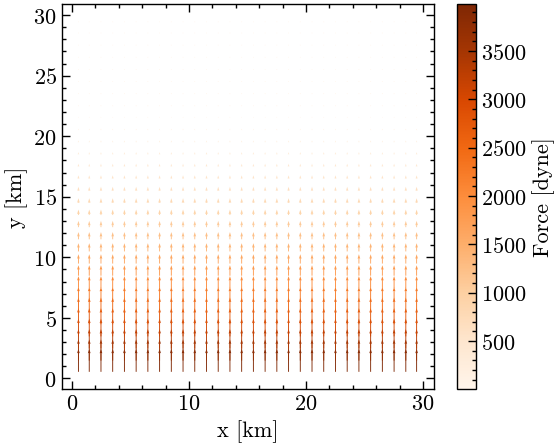

In [29]:
# call the function
fig2, ax2 = BuoyancyForceMap(F_x_res, F_y_res, F_mag_res)

plt.show()

### 4. (8 points) Turbulence (Fourier analysis)

We want to study the spectral properties of the density of turbulent flows using Fourier analysis. Let us consider the turbulence-in-a-box simulation we analysed in class:

https://github.com/wbandabarragan/computational-physics-1/blob/main/exams/data_sets/TURB_DRIVE_SUP_hr.zip

This simulation introduces a stochastic force field to generate turbulent motions in an isothermal ($\gamma=1$) gas initially at rest. Turbulence is continuously generated throughout the whole simulation time.

The simulation folder contains 101 VTK files, jointly with:

- a **units.out** file that contains the CGS normalisation values.
- a **vtk.out** file whose second column contains the times in code units.
- a **grid.out** file that contains information on the grid structure.

Each VTK file stores the following fields:

- density (rho)
- velocity_x (vx1)
- velocity_y (vx2)
- magnetic_field_x (Bx1)
- magnetic_field_y (Bx2)

We will only use the density field for this exercise.


#### (a) Write a python function that reads and returns the density field normalised in CGS units, for any VTK file.

In [30]:
# Define the directory 
directory = "./TURB_DRIVE_SUP_hr/"

In [31]:
# Define a function to read the units.out file 

def units(directory, file_name):
    """
    This function reads the units.out file 
    and returns the normalisation value for the density and distance
    
    Arguments:
            - directory (str) : The directory where the file is located
            - file_name (str) : The name of the file

    Returns:
            - rho_0 (float) : The normalisation value for density
            - L_0 (float)   : The normalisation value for distance
    """
    # Put the data into a pandas dataframe
    df_units = pd.read_csv(directory + file_name)
    
    # read the units and put them into numpy arrays
    rho_0 = np.array(df_units.loc[df_units["variable"] == 'rho_0']['normalisation'])
    L_0 = np.array(df_units.loc[df_units["variable"] == 'L_0']['normalisation'])
    
    return rho_0, L_0

In [32]:
# Call the function
rho_0, L_0 = units(directory , "units.out")

print("rho_0 [g/cm^3]: ", rho_0)
print("L_0 [cm]: ", L_0)

rho_0 [g/cm^3]:  [1.66e-24]
L_0 [cm]:  [3.086e+18]


In [33]:
# Let's open any file in order to see the way data is organised

# Get the data into a mesh
mesh = pv.read(directory + "data.0040.vtk")

print(mesh)
print(mesh.array_names)

RectilinearGrid (0x7f8bfbdfab00)
  N Cells:      40000
  N Points:     40401
  X Bounds:     -2.000e+00, 2.000e+00
  Y Bounds:     -2.000e+00, 2.000e+00
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   201, 201, 1
  N Arrays:     5
['rho', 'vx1', 'vx2', 'Bx1', 'Bx2']


In [34]:
# Create coordinate vectors
X = np.linspace(mesh.bounds[0], mesh.bounds[1], (mesh.dimensions[0])) * L_0
Y = np.linspace(mesh.bounds[2], mesh.bounds[3], (mesh.dimensions[1])) * L_0 

# Generate a meshgrid
X_2D, Y_2D = np.meshgrid(X, Y)

In [35]:
# Define a function to get the density data 

def io_data(filename):
    """
    I/O function: This function reads a vtk file, and returns normalised 
    2D columns in cgs units.
    
    Arguments:
            - filename (str) : The name of the file

    Returns:
            - rho_cgs2D (2D array) : The density data in cgs units
    """
    
    # Opening the mesh
    mesh1 = pv.read(filename)
    
    # Getting the data arrays
    rho = pv.get_array(mesh1, "rho", preference = 'cell') #density in code units

    # Convert the arrays to 2D
    rho_2D_cgs = np.array(rho.reshape(mesh1.dimensions[0] - 1, mesh1.dimensions[1] - 1)) * rho_0

    return rho_2D_cgs

#### (b) Call the above function for VTK file # 40, and make a map of the density field.

In [36]:
# calling the function 
rho_cgs2D = io_data(directory + "data.0040.vtk")

In [37]:
# Create a function to generate de map
def DensMapPlot(array_2D, n, save = False):
    """
    Function to generate a map 
    of a 2D array. 
    
    Arguments:
            - array_2D (2D array) : The 2D array map
            - n (int) : Index of the file
            - save (bool) : Whether to save the figure or not
        
    Returns:
            - Plot and/or save the figure
    """
    fig, ax = plt.subplots(figsize = (8, 6))
    z1 = ax.pcolor(X_2D, Y_2D, array_2D, cmap = "magma_r")
    ax.set_title(f"Density map: VTK file #{n}", fontsize = 20)
    ax.set_xlabel("x [cm]")
    ax.set_ylabel("y [cm]")
    cl = plt.colorbar(z1)
    cl.set_label(r"[g/cm$^3$]")

    if save:
        plt.savefig("./density_map_{:03d}.png".format(n))
        plt.close()
    else:
        plt.show()
        plt.close()

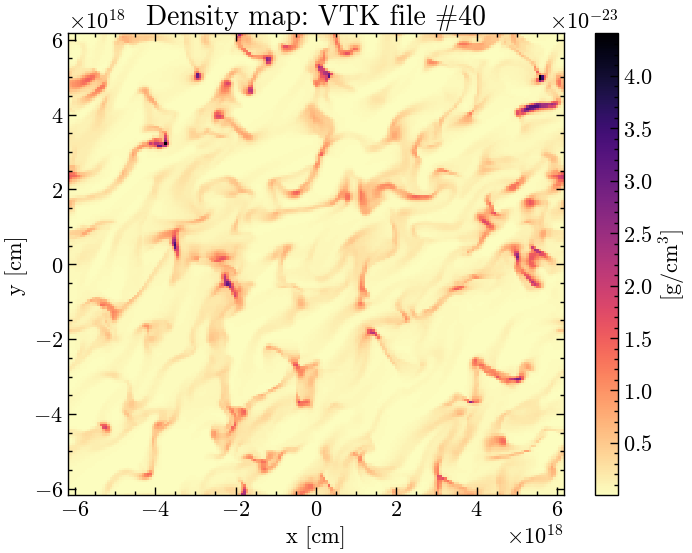

In [38]:
# Call the function 
DensMapPlot(rho_cgs2D, 40)


#### (c) Create a function that Fourier transforms this density map in 2D and returns a two-panel image with the original field and a labeled 2D plot of its Fourier image.

In [39]:
# Function to compute the Fourier transform 

def FourierTransform(array_2D):
    """
    Funtion to compute the Fourier transform of 
    a 2D array map. 

    Arguments:
            - array_2D (np.array) : The 2D array map to be Fourier transformed

    Returns:
            - norm_fourier (np.array) : The normalised Fourier transform
            - shifted_fourier (np.array) : The shifted frequency domain
    """
    
    # Compute the fourier transform 
    fourier = np.fft.fft2(array_2D)

    # shift the fourier transform
    shifted_fourier = np.fft.fftshift(fourier)
    
    # take abs 
    norm_fourier = np.abs(shifted_fourier)
    
    return norm_fourier, shifted_fourier # I will use shifted_fourier for the masking 

In [40]:
def TwoPlotFourier(array_2D, n):
    """
    Function to generate a two-panel plot containing the 
    map of the 2D array and its Fourier transform.
    
    Arguments:
            - array_2D (np.array) : The 2D array map to plot 
            - n (int) : The index of the file
        
    Returns:
            - Show the figure
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    plt.suptitle(f"Density Map and Fourier Transform: VTK file #{n}", fontsize = 20)

    # Plot density map on the first subplot
    z1 = ax[0].pcolor(X_2D, Y_2D, array_2D, cmap="magma_r", vmin = 0, vmax = 1e-23)
    
    ax[0].set_title("Density Map")
    ax[0].set_xlabel("x [cm]")
    ax[0].set_ylabel("y [cm]")
    cb1 = plt.colorbar(z1)
    cb1.set_label(r"[g/cm$^3$]")


    # Plot Fourier transform on the second subplot
    FT, shift = FourierTransform(array_2D)
    z2 = ax[1].pcolor(X_2D,Y_2D,np.log10(FT) ,shading='auto', cmap="magma_r")
    
    ax[1].set_title("Fourier Transform")
    ax[1].set_xlabel(r"$k_x$")
    ax[1].set_ylabel(r"$k_y$")
    cb2 = plt.colorbar(z2)
    

    # Adjust the layout for better spacing between the subplots
    plt.tight_layout()
    plt.show()
    plt.close()

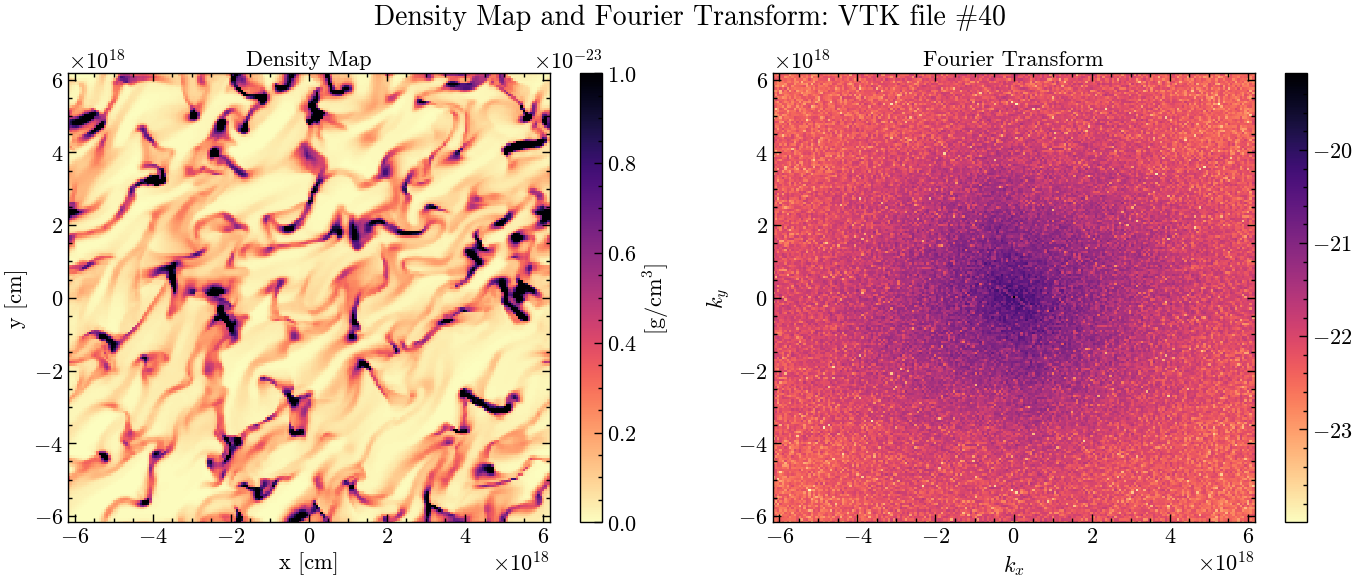

In [41]:
# Call the function
TwoPlotFourier(rho_cgs2D, 40)

#### (d) Create a high-pass filter function that removes low spatial frequencies from the Fourier image and returns the resulting high-pass filter map. What features of the turbulent flow are highlighted in the filtered image and why?

In [42]:
# Call the FourierTransform function 
FT, shifted = FourierTransform(rho_cgs2D)

In [43]:
# Lets define a function for the high-pass filter 

def HighPassFilter(ft_shifted):
    """
    Function to apply a high-pass filter 
    to a Fourier image.
    
    Arguments:
            - ft_shifted (np.array) : The shifted Fourier image to be filtered

    Returns:
            - filtered_data (np.array) : The filtered data in the spatial domain
    """
    
    # define the center of our mask
    image_centre = [ft_shifted.shape[0]//2, ft_shifted.shape[1]//2]
    
    # define the radius of our mask 
    radius_centre = 24 #pixels
    
    mask = Image.new(mode="RGB", size=(200, 200))
    draw = ImageDraw.Draw(mask)
    draw.ellipse((image_centre[0]-radius_centre,
                  image_centre[1]-radius_centre,
                  image_centre[0]+radius_centre,
                  image_centre[1]+radius_centre),
                  fill=(255, 0, 0), outline=(0, 0, 0))
    
    # pass to a binary mask 
    mask = np.array(mask)[:,:,0]//255
    
    # High pass filter 
    H_mask = - mask + 1
    
    # apply the high-pass filter
    filtered_FT = ft_shifted * H_mask
    
    # compute the inverse fourier transform 
    filtered_data = np.fft.ifft2(np.fft.ifftshift(filtered_FT))
    
    return filtered_data.real

In [44]:
# call the filter function 
ift_filtered = HighPassFilter(shifted)

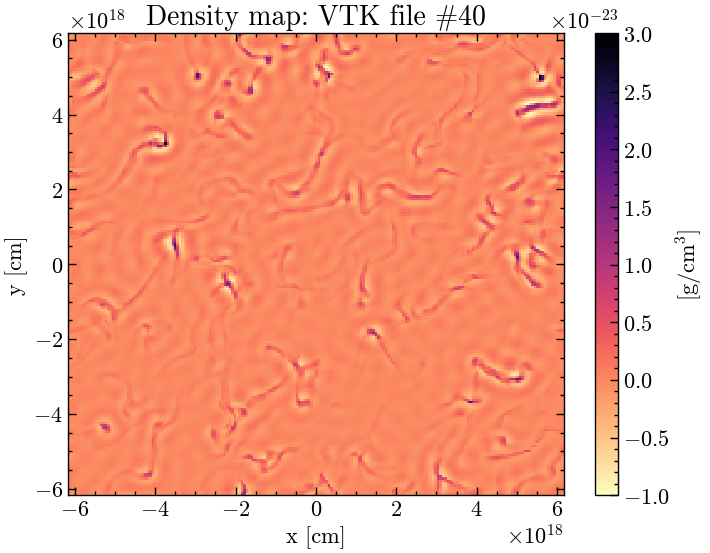

In [45]:
# Plot using the dens_map function 
DensMapPlot(ift_filtered, 40)

We can see that the filtered image shows the places of high density. Which could be analogous to find the edges in a rubik's cube' as we saw in class. 

This happens because edges in an image are characterized by high-frequency components. By performing a Fourier transform on the image and applying a high-pass filter, you can emphasize the high-frequency components and suppress the low-frequency ones. This filtering enhances the regions in the image where there are sharp intensity transitions, which are indicative of edges (mountains).

#### (e) Create a Gaussian-blurring function that smooths the image using a 2D Gaussian and returns three images, the original one and two images blurred with two different variances.

In [46]:
# We generate vectors
x = np.linspace(-2, 2, 200)  # Define x coordinates
y = np.linspace(-2, 2, 200)  # Define y coordinates

# We generate the meshgrid 
X, Y = np.meshgrid(x, y)

In [47]:
# define de gaussian function 
def GaussianMask(x, y, sigma_x, sigma_y):
    """
    Function to get a 2D gaussian function

    Arguments:
            - x (np.array) : The x coordinate
            - y (np.array) : The y coordinate
            - sigma_x (float) : The standard deviation in x
            - sigma_y (float) : The standard deviation in y

    Returns:
            - The 2D gaussian function
    """
    return (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2))))

In [48]:
# Define the gauss bluring function 
def GaussBlur(sigma_x1, sigma_y1, sigma_x2, sigma_y2, array_2D):
    """
    Function to apply a two different Gaussian-blurring 
    to a Fourier transform of a 2D array.

    Arguments:
            - sigma_x1 (float) : The standard deviation in x for the first Gaussian
            - sigma_y1 (float) : The standard deviation in y for the first Gaussian
            - sigma_x2 (float) : The standard deviation in x for the second Gaussian
            - sigma_y2 (float) : The standard deviation in y for the second Gaussian
            - array_2D (np.array) : The 2D array map to be filtered

    Returns:
            - inv_original (np.array) : The inverse Fourier transform of the original image
            - filtered_1 (np.array) : The inverse Fourier transform of the first filtered image
            - filtered_2 (np.array) : The inverse Fourier transform of the second filtered image 
    """
    
    # get the two different gaussians
    gauss_mask1 = GaussianMask(X, Y, sigma_x1, sigma_y1)
    gauss_mask2 = GaussianMask(X, Y, sigma_x2, sigma_y2)
    
    # compute the Fourier transform of the gaussians and the array_2D
    FT1, shifted1 = FourierTransform(array_2D) # Fourier image
    FT2, shifted2 = FourierTransform(gauss_mask1) 
    FT3, shifted3 = FourierTransform(gauss_mask2)
    
    # multiply the mask with the fourier image 
    masked_1 = shifted1 * shifted2
    masked_2 = shifted1 * shifted3
    
    # Inverse Fourier transform 
    inv_original = np.fft.ifft2(np.fft.ifftshift(shifted1))
    inv_filter_1 = np.fft.ifft2(np.fft.ifftshift(masked_1))
    inv_filter_2 = np.fft.ifft2(np.fft.ifftshift(masked_2))
    
    # 
    inv_x_f1 = np.roll(inv_filter_1.real, inv_filter_1.shape[1]//2, axis = 1)
    filtered_1 = np.roll(inv_x_f1, inv_filter_1.shape[0]//2, axis = 0)
    
    inv_x_f2 = np.roll(inv_filter_2.real, inv_filter_2.shape[1]//2, axis = 1)
    filtered_2 = np.roll(inv_x_f2, inv_filter_2.shape[0]//2, axis = 0)
    
    return inv_original.real, filtered_1, filtered_2

In [49]:
# define sigmas
sigma_x1 = 0.03
sigma_y1 = 0.03
sigma_x2 = 0.08
sigma_y2 = 0.08

In [50]:
def GaussBlurPlot(sigma_x1, sigma_y1, sigma_x2, sigma_y2, array_2D):
    """
    Function to generate a three-panel plot containing a map of the
    original 2D array, and two maps of gaussian blured with different sigma.
    
    Arguments:
            - sigma_x1 (float) : The standard deviation in x for the first Gaussian
            - sigma_y1 (float) : The standard deviation in y for the first Gaussian
            - sigma_x2 (float) : The standard deviation in x for the second Gaussian
            - sigma_y2 (float) : The standard deviation in y for the second Gaussian
            - array_2D (np.array) : The 2D array map to be blured

    Returns:
            - Show the figure
    """
    
    # call the function 
    original, filtered1, filtered2  = GaussBlur(sigma_x1, sigma_y1, sigma_x2, sigma_y2, array_2D)
    
    fig, ax = plt.subplots(1, 3, figsize=(26, 7))

    # Plot original density density data
    z1 = ax[0].pcolor(array_2D ,shading='auto', cmap="magma_r",vmin = 0, vmax = 1e-23)
    
    ax[0].set_title("Original density field", fontsize = 16)
    ax[0].set_xlabel("x [cm]")
    ax[0].set_ylabel("y [cm]")
    cb1 = plt.colorbar(z1)
    cb1.set_label(r"[g/cm$^3$]")

    # Plot blured data 1
    z2 = ax[1].pcolor(filtered1 ,shading='auto', cmap="magma_r",vmin = 0, vmax = 1e-20)
    
    ax[1].set_title(r"Blured density field [$\sigma$ = {sigma_x1}]", fontsize = 16)
    ax[1].set_xlabel("x [cm]")
    ax[1].set_ylabel("y [cm]")
    cb2 = plt.colorbar(z2)
    cb2.set_label(r"[g/cm$^3$]")

    # Plot blured data 2
    z3 = ax[2].pcolor(filtered2 ,shading='auto', cmap="magma_r", vmin = 0, vmax = 1e-20)
    
    ax[2].set_title(rf"Blured density field [$\sigma$ = {sigma_x2}]", fontsize = 16)
    ax[2].set_xlabel(r"$k_x$")
    ax[2].set_ylabel(r"$k_y$")
    cb3 = plt.colorbar(z3)
    cb3.set_label(r"[g/cm$^3$]")

    # Adjust the layout for better spacing between the subplots
    plt.tight_layout()
    plt.show()
    plt.close()

    return

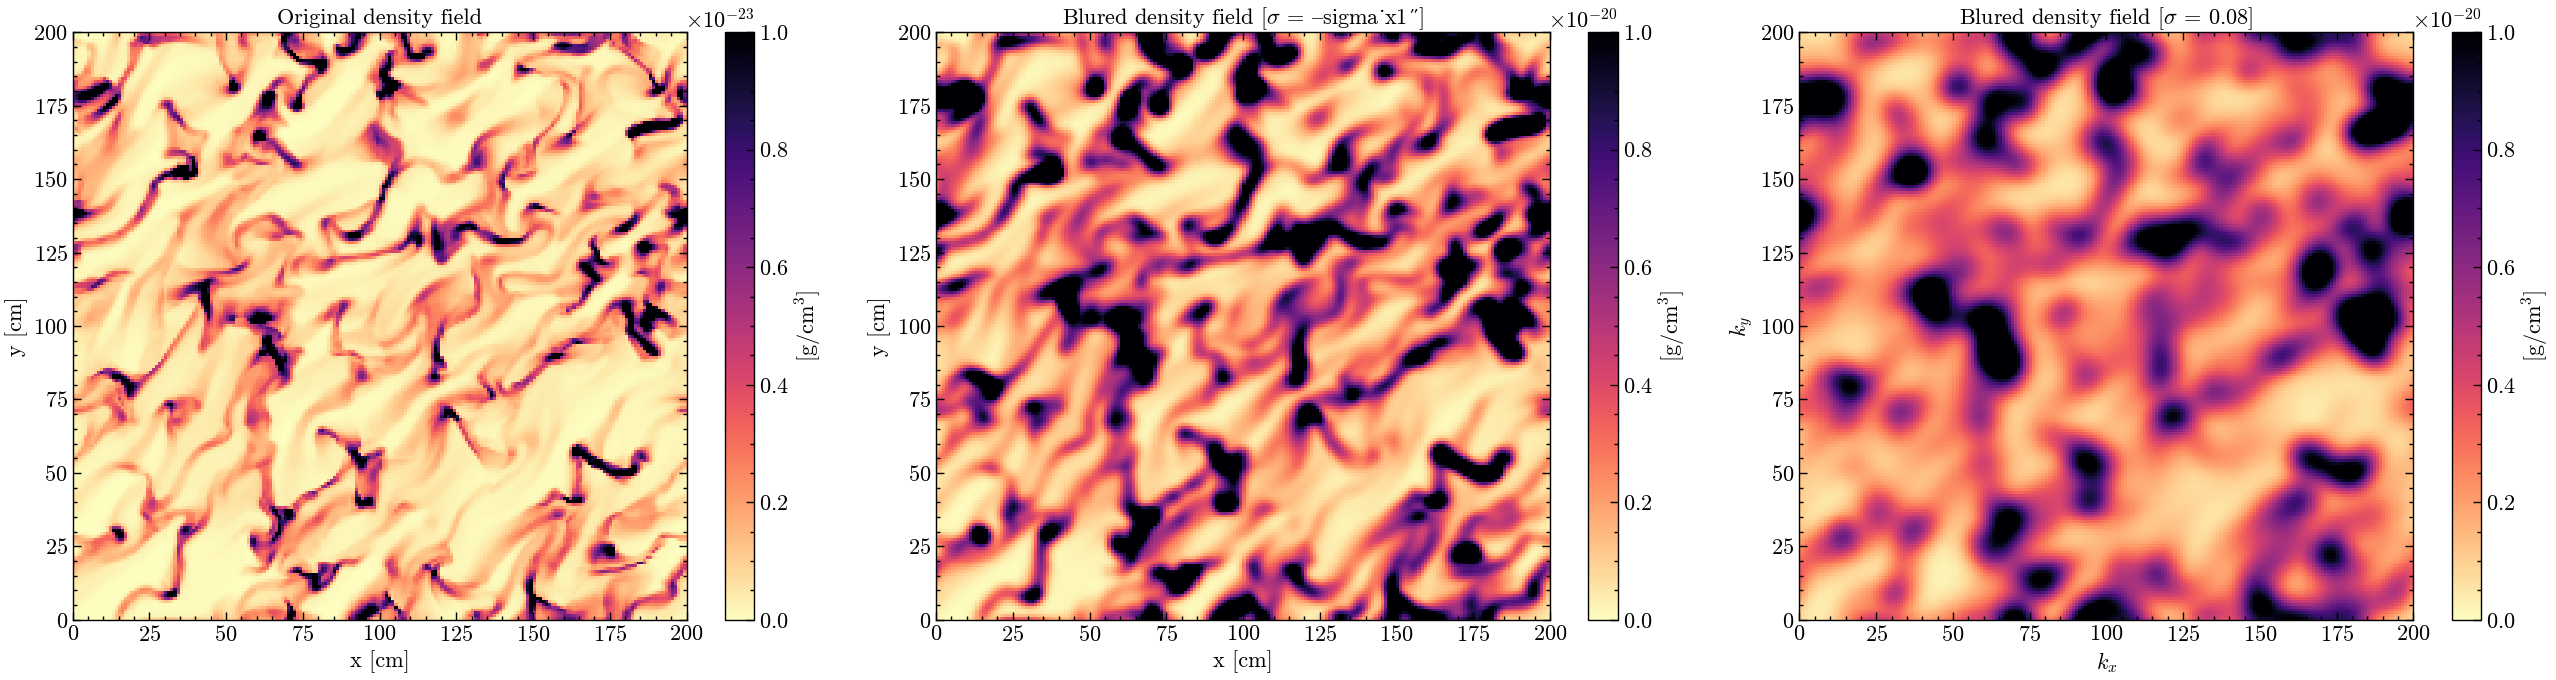

In [51]:
GaussBlurPlot(sigma_x1, sigma_y1, sigma_x2, sigma_y2, rho_cgs2D)